# Load the medical dataset, which comprises binary classification data.*

In [ ]:
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#  breast_tumor_datasetset have been loaded
breast_tumor_dataset = load_breast_cancer()
Features = breast_tumor_dataset.data
Target = breast_tumor_dataset.target

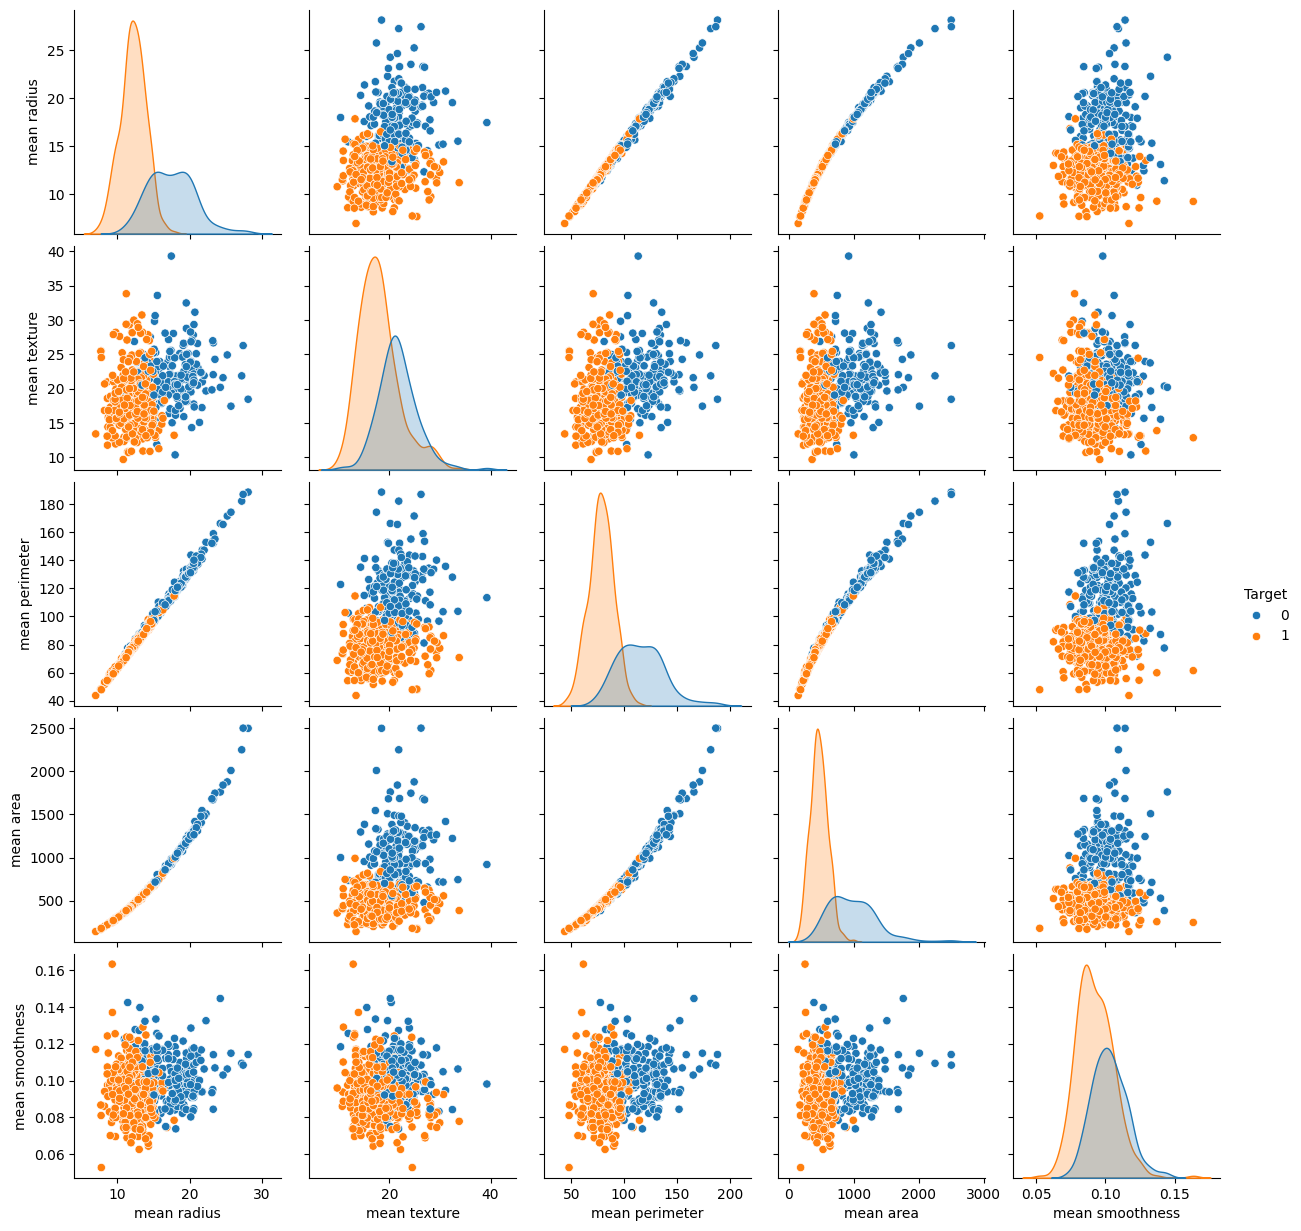

In [29]:

df = pd.DataFrame(data=Features, columns=breast_tumor_dataset.feature_names)
df['Target'] = Target
sns.pairplot(df, hue='Target', vars=breast_tumor_dataset.feature_names[:5])
plt.show()

# I have visulaized our breast cancer dataset for more understanding the features in our dataset

# Splitting the dataset into a test set of 25% and a training set using the train_test_split() function, ensuring that the class distribution is maintained by setting the stratify parameter to the target variable 'y'.

In [30]:
from sklearn.model_selection import train_test_split

X_train_custom, X_test_custom, y_train_custom, y_test_custom = train_test_split(Features, Target, test_size=0.25, stratify=Target, random_state=42)


# Training three distinct models—AdaBoosting, Support Vector Machine (SVM), and Multi-layer Perceptron (MLP) classifier—using the training data obtained in the previous step.

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Train the ML modes given in the question  AdaBoostClassifier , SVM And the Multilayer perceptron
Boosting_ML_model = AdaBoostClassifier()
Boosting_ML_model.fit(X_train_custom, y_train_custom)

SVM_ML_model = SVC()
SVM_ML_model.fit(X_train_custom, y_train_custom)

Multilayer_ML_model = MLPClassifier()
Multilayer_ML_model.fit(X_train_custom, y_train_custom)


MLPClassifier()

# Independently applying the three trained models to the same testing dataset obtained in Step 2. Compare the results of each model using accuracy evaluation metrics.

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Predictions of all ml models
Boosting_ML_model_pred = Boosting_ML_model.predict(X_test_custom)
SVM_ML_model_pred = SVM_ML_model.predict(X_test_custom)
Multilayer_ML_model_pred = Multilayer_ML_model.predict(X_test_custom)

# Accuracy scores of all ml models
Boosting_ML_model_accuracy = accuracy_score(y_test_custom, Boosting_ML_model_pred)
SVM_ML_model_accuracy = accuracy_score(y_test_custom, SVM_ML_model_pred)
Multilayer_ML_model_accuracy = accuracy_score(y_test_custom, Multilayer_ML_model_pred)

# Classification reports of all ml models
Boosting_ML_model_report = classification_report(y_test_custom, Boosting_ML_model_pred)
SVM_ML_model_report = classification_report(y_test_custom, SVM_ML_model_pred)
Multilayer_ML_model_report = classification_report(y_test_custom, Multilayer_ML_model_pred)

# Compare results of  all three ml models
print("AdaBoost ML model   Accuracy:", Boosting_ML_model_accuracy)
print("AdaBoost ML Model Report:\n", Boosting_ML_model_report)


AdaBoost ML model   Accuracy: 0.9440559440559441
AdaBoost ML Model Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92        53
           1       0.95      0.97      0.96        90

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [33]:
print("\n ")
print("Support Vector Machine ML model Accuracy:", SVM_ML_model_accuracy)
print("Support Vector Machine ML model Report:\n", SVM_ML_model_report)



 
Support Vector Machine ML model Accuracy: 0.9230769230769231
Support Vector Machine ML model Report:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89        53
           1       0.91      0.98      0.94        90

    accuracy                           0.92       143
   macro avg       0.93      0.90      0.92       143
weighted avg       0.93      0.92      0.92       143



In [34]:
print("\n ")
print("\nMulti-layer Perceptron ML model Accuracy:", Multilayer_ML_model_accuracy)
print("Multi-layer Perceptron ML model Report:\n", Multilayer_ML_model_report)


 

Multi-layer Perceptron ML model Accuracy: 0.9090909090909091
Multi-layer Perceptron ML model Report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.87        53
           1       0.90      0.97      0.93        90

    accuracy                           0.91       143
   macro avg       0.92      0.89      0.90       143
weighted avg       0.91      0.91      0.91       143



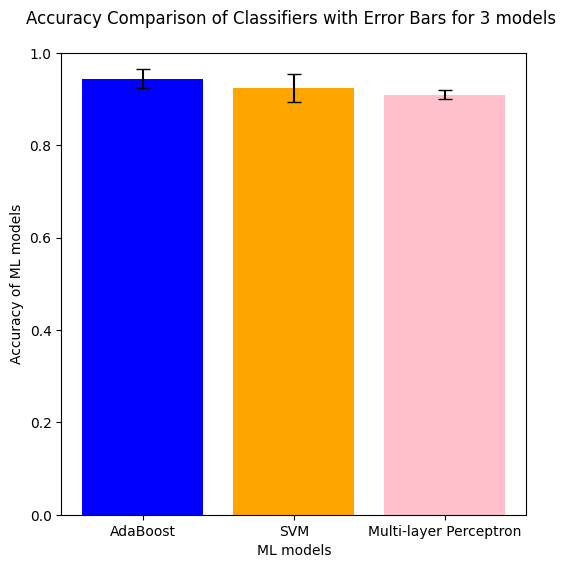

In [40]:
import matplotlib.pyplot as plt

evaluation_accuracy = [Boosting_ML_model_accuracy, SVM_ML_model_accuracy, Multilayer_ML_model_accuracy]
std_devs = [0.02, 0.03, 0.01]

ML_models = ['AdaBoost', 'SVM', 'Multi-layer Perceptron']
size_of_the_figure = (6, 6)
plt.figure(figsize= size_of_the_figure)
plt.bar(ML_models, evaluation_accuracy, yerr=std_devs, capsize=5, color=['blue', 'orange', 'pink'])
plt.xlabel('ML models')
plt.ylabel('Accuracy of ML models')
plt.title('Accuracy Comparison of Classifiers with Error Bars for 3 models \n')
plt.ylim(0, 1)
plt.show()
